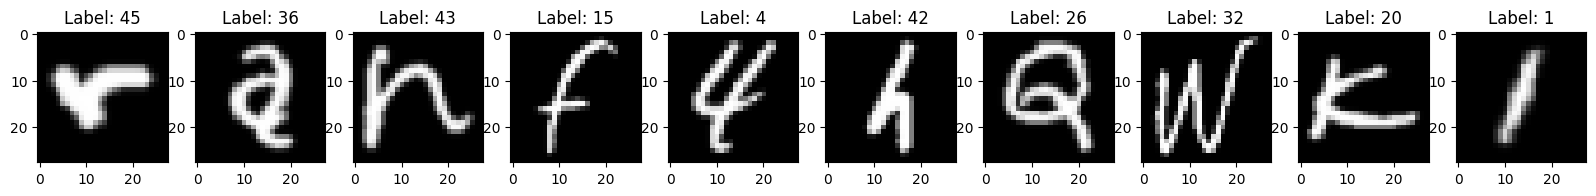

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


In [2]:
import emnist
import json
import numpy as np

# Load local emnist mapping json

with open('emnist_balanced_mapping.json', 'r') as f:
    emnist_mapping = json.load(f)

emnist_data = emnist.extract_training_samples('balanced')

# Split the data into images and labels
images, labels = emnist_data

# Print the unique label values
unique_labels = set(labels)

# show all the images
# Define a mapping from label values to characters

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(10):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')
plt.show()

characters = [chr(emnist_mapping[str(label)]) for label in unique_labels]
print(characters)


In [3]:
# view the shape of the dataset
images[0].shape

(28, 28)

In [6]:
(X_train, y_train) = emnist.extract_training_samples('balanced')
(X_test, y_test) = emnist.extract_test_samples('balanced')

# Make x_train and x_test into 4 dimensional arrays (60000, 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)


In [10]:
len(set(y_train))

47

In [7]:
from common.conv_net import SimpleConvNet
from common.trainer import Trainer




max_epochs = 10

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=len(unique_labels), weight_init_std=0.01)

trainer = Trainer(network, X_train, y_train, X_test, y_test,
                    epochs=max_epochs, mini_batch_size=100,
                    optimizer='Adam', optimizer_param={'lr': 0.001},
                    evaluate_sample_num_per_epoch=1000)

trainer.train()
network.save_params("emnist_params.pkl")
print("Saved Network Parameters!")

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:3.4641768814125657
=== epoch:1, train acc:0.04, test acc:0.033 ===
train loss:3.5892251107435653
train loss:3.5272875228868554
train loss:3.4654339223581814
train loss:3.419945775484967
train loss:3.1306434061852952
train loss:3.049246209650538
train loss:2.846991171376095
train loss:2.6911244616051238
train loss:2.734587279483965
train loss:2.3064002047999432
train loss:2.2798078385081975
train loss:2.3516589803537276
train loss:2.2418883849846054
train loss:1.973483832446749
train loss:1.9685716035228904
train loss:2.0721450458640374
train loss:1.9794472487023802
train loss:2.0225884837852806
train loss:1.6908096978204643
train loss:1.7449690658445158
train loss:1.8338474997195573
train loss:1.7366091838903202


KeyboardInterrupt: 